#### Feature engineering and analysis
#### GIS Machine learning training and evaluation

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# Load a shapefile data
path = r"C:\Users\Learner\Desktop\-111daysofCFCchallenge\data\ServiceDistricts.shp"
# Reading a shapefile data
gdf = gpd.read_file(path)
# .shx has index while .shp is the original file with the geolocations stored.

#### Buffer: A zone around a geographic feature (e.g., a 0.5-degree buffer zone around the polygon).

In [5]:
# Create a buffer of 0.5 units around each polygon (buffer size in CRS units, which here are degrees for EPSG:4326)
gdf['buffer'] = gdf.geometry.buffer(0.5)

print(gdf[['geometry', 'buffer']])

                                            geometry  \
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...   
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...   

                                              buffer  
0  POLYGON ((1694510.719 643580.137, 1694519.91 6...  
1  MULTIPOLYGON (((1694089.268 645095.353, 169411...  


#### Centroid: The central point of the polygon that represents the "center" of the polygon.

In [6]:
# Calculate the centroids of the polygons
gdf['centroid'] = gdf.geometry.centroid

print(gdf[['geometry', 'centroid']])

                                            geometry  \
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...   
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...   

                         centroid  
0  POINT (1747906.016 658532.734)  
1  POINT (1730139.064 675795.933)  


#### Area: The total area of the polygon.
#### Perimeter: The total perimeter (boundary length) of the polygon.

In [7]:
# Calculate the area and perimeter of each polygon
gdf['area'] = gdf.geometry.area
gdf['perimeter'] = gdf.geometry.length

print(gdf[['geometry', 'area', 'perimeter']])

                                            geometry          area  \
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...  5.513380e+09   
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...  9.128327e+09   

      perimeter  
0  7.673590e+05  
1  1.381010e+06  


#### Distance to First Polygon: The distance from the centroid of each polygon to the first polygon's centroid.

In [8]:
# Calculate the distance between the centroids of each polygon and the first polygon
gdf['distance_to_first'] = gdf['centroid'].distance(gdf['centroid'].iloc[0])

print(gdf[['centroid', 'distance_to_first']])

                         centroid  distance_to_first
0  POINT (1747906.016 658532.734)            0.00000
1  POINT (1730139.064 675795.933)        24772.61836


#### Machine Learning in GIS

In [9]:
# pip install scikit-learn

In [10]:
import folium
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [11]:
# Create a sample GeoDataFrame (You could also load real GIS data from a file like a shapefile)
data = {
    'longitude': np.random.uniform(-180, 180, 1000),
    'latitude': np.random.uniform(-90, 90, 1000),
    'class': np.random.choice([0, 1], size=1000)  # Random class (0 or 1) for classification
}

In [12]:
# Create dataframe
df = pd.DataFrame(data)
# convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

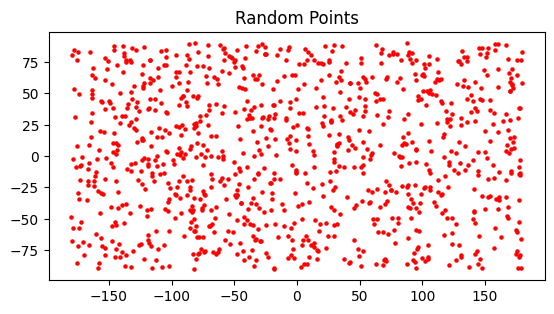

In [13]:
# Plotting the points on a map
gdf.plot(marker='o', color='red', markersize=5)
plt.title('Random Points')
plt.show()

In [14]:
# Split dataset into features (X) and labels (y)
X = df[['longitude', 'latitude']]  # Features: coordinates
y = df['class']  # Labels: class

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.48      0.51       109
           1       0.47      0.55      0.51        91

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.51      0.51       200



In [19]:
# Show the importance of each feature (longitude and latitude)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.49952175 0.50047825]


#### Machine Learning for Land Use

In [20]:
# Generate random latitudes and longitudes
n = 1000  # Number of data points
np.random.seed(42)
latitudes = np.random.uniform(low=20.0, high=50.0, size=n)  # Latitude between 20° and 50°
longitudes = np.random.uniform(low=-120.0, high=-60.0, size=n)  # Longitude between -120° and -60°

In [21]:
# Generate random land use classification (Urban = 1, Rural = 0)
land_use = np.random.choice([0, 1], size=n)  # Randomly choose 0 (rural) or 1 (urban)

In [22]:
# Create a DataFrame with these values
data = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'land_use': land_use
})

In [23]:
# Convert to a GeoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

In [24]:
gdf.sample(3)

,latitude,longitude,land_use,geometry
926,28.060321,-84.707864,0,POINT (-84.70786 28.06032)
672,22.407012,-67.916599,0,POINT (-67.9166 22.40701)
114,39.002113,-84.423604,1,POINT (-84.4236 39.00211)


#### data cleaning

In [25]:
# check for missing values
gdf.isnull().sum()

latitude     0
longitude    0
land_use     0
geometry     0
dtype: int64

In [26]:
# check for duplicates
gdf.duplicated().sum()

np.int64(0)

#### data visualization

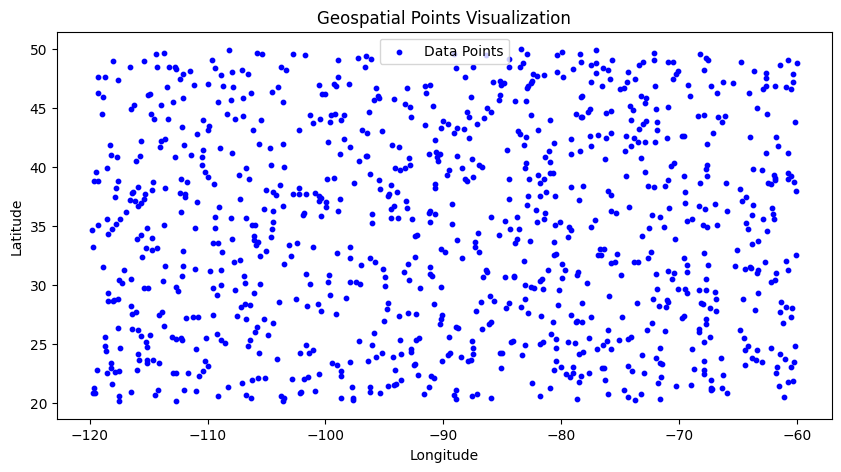

In [27]:
# Plot the points on a map using geopandas
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the GeoDataFrame, which will display the points on a base map
gdf.plot(ax=ax, color='blue', markersize=10, label='Data Points')

# Add title and labels to the map
plt.title("Geospatial Points Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Show the map
plt.show()

In [28]:
# Create a map centered at the average latitude and longitude of the points
map_center = [gdf['latitude'].mean(), gdf['longitude'].mean()]
maph = folium.Map(location=map_center, zoom_start=6)

In [29]:
# Add a marker for each point in the GeoDataFrame
for idx, row in gdf.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker(
        location=[lat, lon],  # The latitude and longitude for the marker
        popup=f"ID: {idx}\nLand Use: {'Urban' if row['land_use'] == 1 else 'Rural'}",  # Popup with information
        icon=folium.Icon(color="blue" if row['land_use'] == 1 else "green")  # Marker color based on land use
    ).add_to(maph)

In [30]:
maph

#### machine learning

In [31]:
# Step 3: Feature Selection and Data Preparation
X = gdf[['latitude', 'longitude']]  # Features (latitudes and longitudes)
y = gdf['land_use']  # Target variable (land use)

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Train a Machine Learning Model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make Predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49666666666666665

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       158
           1       0.47      0.50      0.48       142

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

